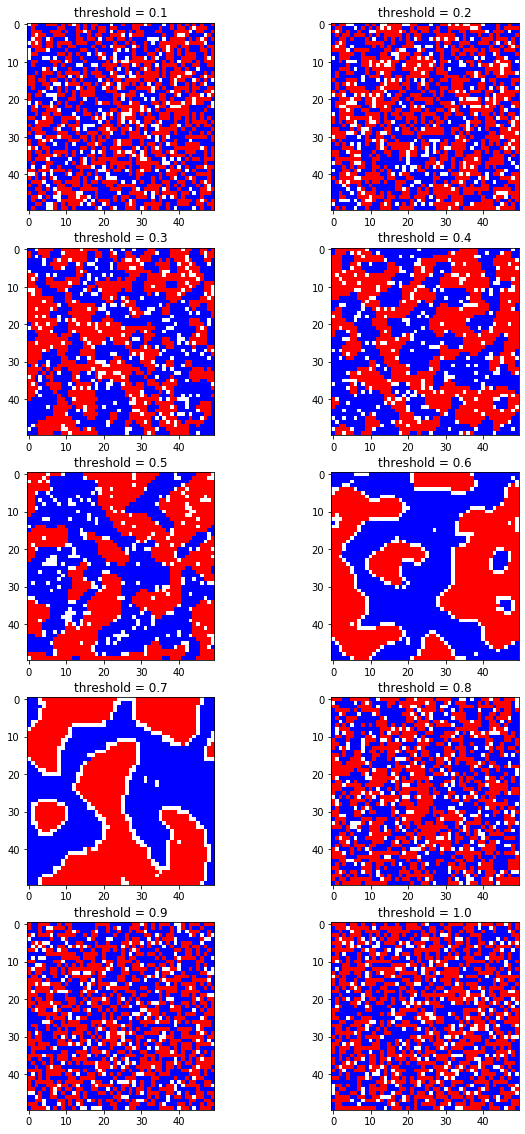

In [10]:
import random
from matplotlib import pyplot as plt

def create_grid(
    elements,
    n_rows,
    n_cols,
):
    """
    Erstellt eine Matrix als Liste von Listen und befüllt diese mit Elementen, 
    welche zufällig aus der Liste *elements* gezogen werden.
    """
    grid = []
    for i in range(n_rows):
        row = []
        for j in range(n_cols):
            cell_status = random.choice(elements)
            row.append(cell_status)
        
        grid.append(row)
    return grid



def get_moore_neighbors(row, col, grid):
    
    """
    Sucht die 8 umgebenden Zellen der sogenannten Moore-Nachbarschaft heraus und gibt diese in einer Liste aus.
    
    Das Grid wird (mittels Modulo) als Torus behandelt d.h. das rechte Ende der Matrix schließt an das
    linke Ende der Matrix und das obere Ende der Matrix schließt an das untere Ende der Matrix an.
    
    row: Zeilen-Index des behandelten Agenten/der behandelten Zelle
    col: Spalten-Index des behandelten Agenten/der behandelten Zelle
    grid: Grid/Matrix als Liste von Listen; Beinhaltet die Agenten/Zellen auf unterster Ebene
    
    """
    
    # Anzahl der Zeilen in Grid/Matrix messen
    n_rows = len(grid)
    
    # Anzahl der Spalten in Grid/Matrix messen, indem die Anzahl der "Spalten" in der ersten Zeile gemessen wird
    n_cols = len(grid[0])
    
    # die 8 umgebenden Nachbarn heraussuchen und in Liste speichern
    neighbors = [
            grid[(row-1)%n_rows][(col-1)%n_cols], # oben-links
            grid[(row-1)%n_rows][col],            # oben
            grid[(row-1)%n_rows][(col+1)%n_cols], # oben-rechts
            
            grid[row][(col-1)%n_cols],            # links
            grid[row][(col+1)%n_cols],            # rechts

            grid[(row+1)%n_rows][(col-1)%n_cols], # unten-links
            grid[(row+1)%n_rows][col],            # unten
            grid[(row+1)%n_rows][(col+1)%n_cols], # unten-rechts
        ]
    
    # Liste von Nachbarn ausgeben
    return neighbors

# Aufgabe 3
# Funktionskopf der Funktion *schelling()*
def schelling(
    threshold,
    elements = [7,7,7,7,8,9,9,9,9],
    empty_cell = 8,
    n_time_steps = 3000000,
    n_rows = 50,
    n_cols = 50,
):
    
    # Aufgabe 4
    # Grid initial erstellen
    grid = create_grid(
        elements,
        n_rows,
        n_cols,
    )
    
    # Aufgabe 5
    # für jeden Zeitschritt
    for i in range(n_time_steps):
        
        # Aufgabe 6
        # Zufällige Zeile wählen
        row = random.choice(range(len(grid)))
        
        # Zufällige Spalte wählen
        col = random.choice(range(len(grid[0])))
        
        # Aufgabe 7
        # Wenn das Element keine leere Zelle ist (sondern Agent)
        if grid[row][col] != 8:
            
            # Aufgabe 8
            # Nachbarn des Agenten heraussuchen und in Liste abspeichern
            my_neighborhood = get_moore_neighbors (row, col, grid)
            
            # Aufgabe 9
            # Zählvariable für Nachbarn d.h. nicht-leere Zellen in Nachbarschaft auf 0 setzen
            n_agents = 0
            
            # Zählvariable für Nachbarn der selben Gruppe auf 0 setzen
            n_agents_of_my_group = 0
            
            # für jedes Element in Nachbarschaft
            for neighbor in my_neighborhood:
                
                # wenn Nachbar Agent bzw. keine leere Zelle ist
                if neighbor != 8:
                    # Zählvariable für nicht-leere Zellen in Nachbarschaft 1 erhöhen
                    n_agents += 1
                
                # wenn Nachbar in selber Gruppe wie Agent
                if neighbor == grid[row][col]:
                    # Zählvariable für Nachbarn der selben Gruppe 1 erhöhen
                    n_agents_of_my_group += 1
                
            
            # Aufgabe 10
            # wenn Agent nicht nur von leeren Zellen umgeben ist
            if n_agents > 0:
                
                # Anteil der eigenen Gruppe in Nachbarschaft berechnen
                share_of_my_group = n_agents_of_my_group / n_agents
                
                # Aufgabe 11
                # wenn der Anteil der Nachbarn der eigenen Gruppe an allen Nachbarn (ohne leere Zellen) 
                # kleiner Grenzwert ist
                if share_of_my_group < threshold:
                    
                    # Aufgabe 12
                    # Zufällige neue Zeile wählen
                    new_row = random.choice(range(len(grid)))
                    
                    # Zufällige neue Spalte wählen
                    new_col = random.choice(range(len(grid[0])))
                    
                    # Wenn auf neuer Position eine leere Zelle ist
                    if grid[new_row][new_col] == 8:
                        
                        # Agent auf neue Position setzen
                        grid[new_row][new_col] = grid[row][col]
                        
                        # Auf alter Position eine leere Zelle einfügen
                        grid[row][col] = 8
    
    # Aufgabe 13
    # Grid ausgeben
    return grid


# Aufgabe 14 & 15
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(10, 20)

ax[0][0].imshow(schelling(0.1), cmap = "bwr")
ax[0][0].set(title="threshold = 0.1")

ax[0][1].imshow(schelling(0.2), cmap = "bwr")
ax[0][1].set(title="threshold = 0.2")

ax[1][0].imshow(schelling(0.3), cmap = "bwr")
ax[1][0].set(title="threshold = 0.3")

ax[1][1].imshow(schelling(0.4), cmap = "bwr")
ax[1][1].set(title ="threshold = 0.4")

ax[2][0].imshow(schelling(0.5), cmap = "bwr")
ax[2][0].set(title="threshold = 0.5")

ax[2][1].imshow(schelling(0.6), cmap = "bwr")
ax[2][1].set(title="threshold = 0.6")

ax[3][0].imshow(schelling(0.7), cmap = "bwr")
ax[3][0].set(title="threshold = 0.7")

ax[3][1].imshow(schelling(0.8), cmap = "bwr")
ax[3][1].set(title="threshold = 0.8")

ax[4][0].imshow(schelling(0.9), cmap = "bwr")
ax[4][0].set(title="threshold = 0.9")

ax[4][1].imshow(schelling(1.0), cmap = "bwr")
ax[4][1].set(title="threshold = 1.0")

plt.show()

Ab einem Threshold von >= 0.8 findet innerhalb dieser Implementierung des Schelling-Modells keine wirkliche Segregation mehr statt, da die Agenten niemals bzw. sehr selten mit ihrem aktuellen Wohnort zufrieden sind und somit immer wieder zu einem **zufälligen** Wohnort umziehen, womit auch die Verteilung der Agenten auf dem Grid zufällig bleibt.